In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.optimizers import Adam
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Flatten,Conv1D,MaxPooling1D,RepeatVector
from sklearn.metrics import mean_squared_error,r2_score
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler

In [199]:
df1 = pd.read_csv(r'D:\data_sets_git\pv_input_pvod.csv')
df1.Timestamp = pd.to_datetime(df1['date_time'])
df1.set_index('date_time',inplace=True)

#scaling
scaler = MinMaxScaler()
num_vars = ['lmd_totalirrad','lmd_temperature','lmd_pressure','lmd_winddirection','lmd_windspeed','power']
M = (df1.max())
m = (df1.min())
df1[num_vars] = scaler.fit_transform(df1[num_vars])
M=np.array(M)
m=np.array(m)
M=np.reshape(M,(1,6))
m=np.reshape(m,(1,6))

#devision of data
train_len = math.ceil(len(df1)*0.95)
val_len=math.ceil(len(df1)*0.9965)
print(train_len)
print(val_len)
window=10

27452
28795


C:\Users\Z0172746\AppData\Local\Temp\ipykernel_20148\1551234008.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.Timestamp = pd.to_datetime(df1['date_time'])


In [200]:
#traing data set
train_data = df1.iloc[0:train_len]
X_train = []
Y_train = []
for i in range(window, len(train_data)):
    X_train.append(train_data.iloc[i - window:i])
    Y_train.append(train_data.iloc[i])

X_train, Y_train = np.array(X_train), np.array(Y_train)
Y_train =np.reshape(Y_train,(Y_train.shape[0],6))

#validation
val_data = df1.iloc[train_len-window:val_len]
X_val = []
Y_val = []
for i in range(window, len(val_data)):
    X_val.append(val_data.iloc[i - window:i])
    Y_val.append(val_data.iloc[i])

X_val, Y_val = np.array(X_val), np.array(Y_val)
Y_val = np.reshape(Y_val,(Y_val.shape[0],6))

#testing data
test_data = df1.iloc[val_len-window:]
X_test = []
Y_test = []
for i in range(window, len(test_data)):
    X_test.append(test_data.iloc[i - window:i])
    Y_test.append(test_data.iloc[i])

X_test, Y_test = np.array(X_test), np.array(Y_test)
Y_test = np.reshape(Y_test,(Y_test.shape[0],6))

In [207]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(27442, 10, 6)
(27442, 6)
(101, 10, 6)
(101, 6)
(1343, 10, 6)
(1343, 6)


In [208]:
def denorm(a):
    return a*(M-m)+m

In [209]:
# MODEL
model = Sequential()
model.add(Conv1D(filters=10, kernel_size=3, activation = 'relu',input_shape=(10,6)))
model.add(Conv1D(filters=10, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=10, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=10, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=10, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(Dense(30))
model.add(Dense(6))
opt1 = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=opt1, metrics = ['mae'])
model.fit(X_train, Y_train, epochs=200, batch_size=10, verbose=1)

ValueError: Exception encountered when calling layer "conv1d_78" (type Conv1D).

Negative dimension size caused by subtracting 3 from 2 for '{{node conv1d_78/Conv1D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv1d_78/Conv1D/ExpandDims, conv1d_78/Conv1D/ExpandDims_1)' with input shapes: [?,1,2,10], [1,3,10,10].

Call arguments received by layer "conv1d_78" (type Conv1D):
  • inputs=tf.Tensor(shape=(None, 2, 10), dtype=float32)

In [ ]:
# MODEL
model = Sequential()
model.add(Conv1D(filters = 10, kernel_size=3, activation = 'relu',input_shape=(5,6)))
model.add(Conv1D(filters=10, kernel_size=3, activation='relu'))
# model.add(Conv1D(filters=10, kernel_size=3, activation='relu'))
# model.add(Conv1D(filters=10, kernel_size=3, activation='relu'))
# model.add(Conv1D(filters=10, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
# model.add(RepeatVector(30))
# model.add(LSTM(50, return_sequences=True ,activation='relu', input_shape=(X_train.shape[1], 1), recurrent_dropout=0.2))
# model.add(LSTM(75, return_sequences=True, activation='relu'))
# model.add(LSTM(10, return_sequences=False, activation='relu'))
# model.add(Dense(100))
# model.add(Dropout(0.2))
# model.add(Dense(50))
# model.add(Dropout(0.2))
# model.add(Dense(25))
model.add(Dense(30))
model.add(Dense(6))
opt1 = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=opt1, metrics = ['mae'])
model.fit(X_train, Y_train, epochs=200, batch_size=10, verbose=1)

ValueError: Exception encountered when calling layer "max_pooling1d_14" (type MaxPooling1D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling1d_14/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_14/ExpandDims)' with input shapes: [?,1,1,10].

Call arguments received by layer "max_pooling1d_14" (type MaxPooling1D):
  • inputs=tf.Tensor(shape=(None, 1, 10), dtype=float32)

In [ ]:
# Prediction
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
outTest = model.predict(X_test)

rr1=(np.round(np.sqrt(mean_squared_error(denorm(Y_train)[:,5],denorm(lstm_train_pred)[:,5])),4))
rr2 = (np.round(np.sqrt(mean_squared_error(denorm(Y_val)[:,5], denorm(lstm_valid_pred)[:,5])), 4))

print('Training error:', rr1)
print('Validation error:', rr2)

4/4 [==============================] - 0s 2ms/step
Training error: 0.2935
Validation error: 0.3516


In [ ]:
# plt.figure(figsize=(30, 6))
# plt.plot(denorm(Y_train)[:,5][0:500])
# plt.plot(denorm(lstm_train_pred)[:,5][0:500])
# plt.title('gen prediction_train')
# plt.xlabel("Time step in 15 min")
# plt.ylabel("power") 
# plt.legend(['Validation', 'Predictions'])
# plt.show()

In [ ]:
# plt.figure(figsize=(30, 6))
# plt.plot(denorm(Y_val)[:,0][0:500])
# plt.plot(denorm(lstm_valid_pred)[:,0][0:500])
# plt.title('gen prediction_val') 
# plt.xlabel("Time step 15 min")
# plt.ylabel("power")
# plt.legend(['Validation', 'Predictions'])
# plt.show()

In [ ]:
lstm_test_pred=model.predict(X_test)
rr3=(np.round(np.sqrt(mean_squared_error(denorm(Y_test)[:,5],denorm(lstm_test_pred)[:,5])),4))
print('test error RMSE: ',rr3)

4/4 [==============================] - 0s 2ms/step
test error RMSE:  0.394


In [ ]:
# plt.figure(figsize=(6, 6))
# plt.plot(denorm(Y_test)[:,4])
# plt.plot(denorm(lstm_test_pred)[:,4])
# plt.title('gen prediction_test') 
# plt.xlabel("Time stem in 15 min")
# plt.ylabel("power")
# plt.legend(['Target', 'Predictions'])
# plt.show()

In [ ]:
# (denorm(Y_test)[:,4])

In [ ]:
denorm(lstm_test_pred)[:,4]

array([1.36054327, 1.3615445 , 1.38403102, 1.38704938, 1.39683875,
       1.40803385, 1.38335739, 1.37410421, 1.3653895 , 1.36548502,
       1.37075577, 1.40865794, 1.40884532, 1.41951365, 1.45436604,
       1.44625877, 1.44759415, 1.40934951, 1.40525262, 1.39553717,
       1.38899804, 1.38321063, 1.37090926, 1.36953148, 1.34687918,
       1.34860983, 1.34336763, 1.34061949, 1.38141358, 1.47552779,
       1.55874536, 1.65098453, 1.66640703, 1.69872156, 1.71595636,
       1.71904687, 1.83286655, 2.08095866, 2.19646866, 2.29442618,
       2.46163762, 2.53711952, 2.49124513, 2.61286064, 2.67034988,
       2.63986143, 2.91818018, 2.92528017, 2.91012414, 2.82242906,
       2.9193794 , 2.73382253, 2.59151329, 2.48785814, 2.40130204,
       2.38257669, 2.22608213, 2.35336078, 2.28527794, 2.37982508,
       2.44805181, 2.46612909, 2.63084339, 2.66625061, 2.67232916,
       2.60346744, 2.40995402, 2.16990508, 2.07812341, 2.06282271,
       1.99690365, 1.95882906, 1.88297635, 1.80063942, 1.77514

In [ ]:
yp=np.zeros([101,6])
X_test[0]
xt=np.reshape(X_test[0],(1,X_test.shape[1],X_test.shape[2]))
xp=xt
print(xp.shape)
for i in range(101):
    yt=model.predict(xt)
    print(yt.shape)
    yp[i]=yt
    xp=np.reshape(xp,(window+i,6))
    xp=np.append(xp,yt)
    print(xp.shape)
    xp=np.reshape(xp,(window+1+i,6))
    print(xp.shape)
    xt=xp[i+1:]
    print(xt.shape)
    xt=np.reshape(xt,(1,window,6))
    print(xt.shape)

(1, 20, 6)
1/1 [==============================] - 0s 16ms/step
(1, 6)
(126,)
(21, 6)
(20, 6)
(1, 20, 6)
1/1 [==============================] - 0s 19ms/step
(1, 6)
(132,)
(22, 6)
(20, 6)
(1, 20, 6)
1/1 [==============================] - 0s 20ms/step
(1, 6)
(138,)
(23, 6)
(20, 6)
(1, 20, 6)
1/1 [==============================] - 0s 19ms/step
(1, 6)
(144,)
(24, 6)
(20, 6)
(1, 20, 6)
1/1 [==============================] - 0s 16ms/step
(1, 6)
(150,)
(25, 6)
(20, 6)
(1, 20, 6)
1/1 [==============================] - 0s 15ms/step
(1, 6)
(156,)
(26, 6)
(20, 6)
(1, 20, 6)
1/1 [==============================] - 0s 17ms/step
(1, 6)
(162,)
(27, 6)
(20, 6)
(1, 20, 6)
1/1 [==============================] - 0s 15ms/step
(1, 6)
(168,)
(28, 6)
(20, 6)
(1, 20, 6)
1/1 [==============================] - 0s 15ms/step
(1, 6)
(174,)
(29, 6)
(20, 6)
(1, 20, 6)
1/1 [==============================] - 0s 16ms/step
(1, 6)
(180,)
(30, 6)
(20, 6)
(1, 20, 6)
1/1 [==============================] - 0s 15ms/step
(1, 6)


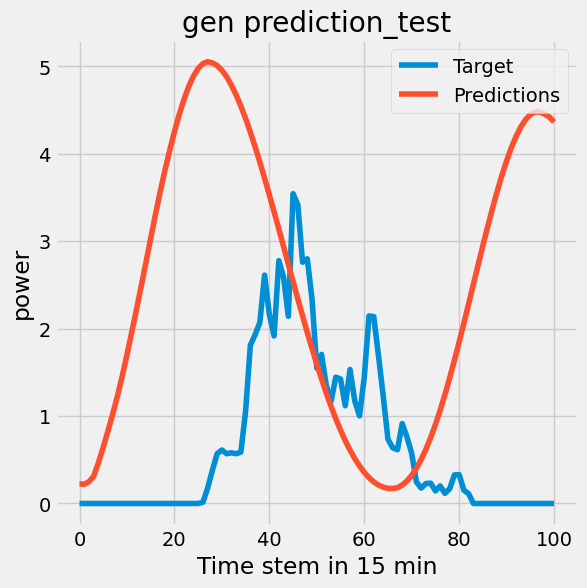

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(denorm(Y_test)[:,5])
plt.plot(denorm(yp)[:,5])
plt.title('gen prediction_test') 
plt.xlabel("Time stem in 15 min")
plt.ylabel("power")
plt.legend(['Target', 'Predictions'])
plt.show()